## Marketing Analytics For E-Commerce Market Place Company

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
%matplotlib inline

In [2]:
Customers = pd.read_csv(r"D:\BA\Python\Basic Exercises\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\CUSTOMERS.csv")
Customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [3]:
Geo_Location = pd.read_csv(r"D:\BA\Python\Basic Exercises\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\GEO_LOCATION.csv")
Geo_Location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


<AxesSubplot: xlabel='geolocation_state', ylabel='count'>

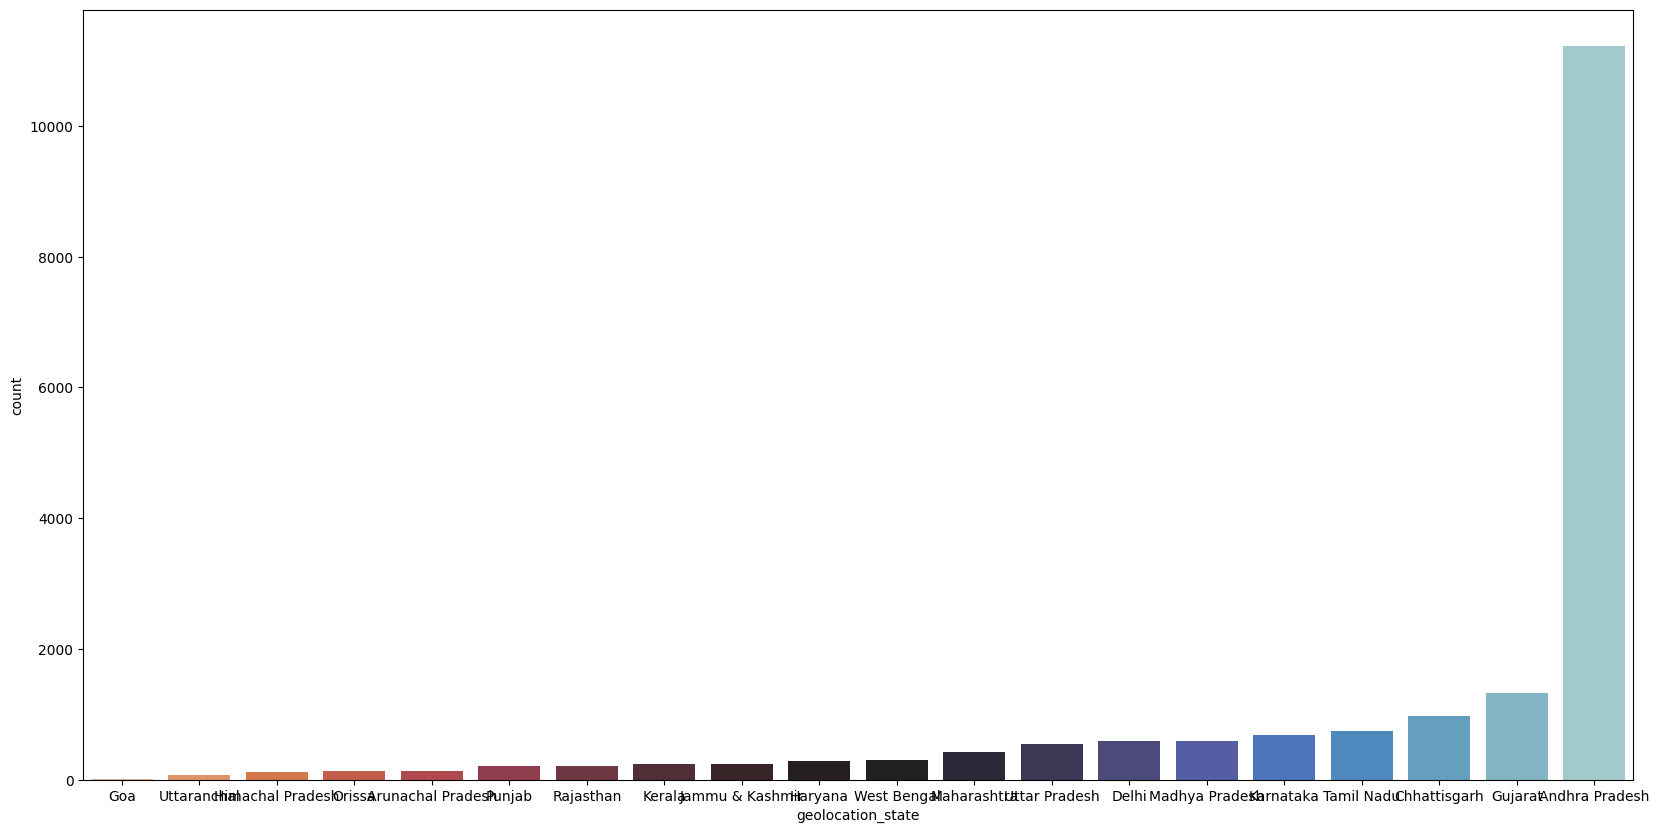

In [4]:
plt.figure(figsize=(20,10))
sns.countplot(x ='geolocation_state', data=Geo_Location, 
order=Geo_Location['geolocation_state'].value_counts().sort_values().index, palette='icefire_r')

##### The above graph shows the number of product orders purchased based on the states. According to that, Andhra Pradesh has the highest rate and there is a huge gap between the rest of the states.

In [5]:
Order_Items = pd.read_csv(r"D:\BA\Python\Basic Exercises\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_ITEMS.csv")
Order_Items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [6]:
Order_Pays = pd.read_csv(r"D:\BA\Python\Basic Exercises\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_PAYMENTS.csv")
Order_Pays.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
Order_Pays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [8]:
Order_rev_ratings = pd.read_csv(r"D:\BA\Python\Basic Exercises\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv")
Order_rev_ratings.head() 

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [9]:
Order_rev_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
Orders = pd.read_csv(r"D:\BA\Python\Basic Exercises\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDERS.csv")
Orders.head() 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [11]:
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
Orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
Orders['order_delivered_customer_date']= Orders['order_delivered_customer_date'].fillna(method='ffill')
Orders['order_delivered_customer_date'].isnull().sum()

0

In [14]:
Orders['delivered_time']=pd.to_datetime(Orders['order_delivered_customer_date'],format='%m/%d/%Y %H:%M').dt.date
Orders['estimate_time']=pd.to_datetime(Orders['order_estimated_delivery_date'], format='%m/%d/%Y %H:%M').dt.date

In [15]:
Orders['weekly']=pd.to_datetime(Orders['order_delivered_customer_date'],format='%m/%d/%Y %H:%M').dt.week

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_7700\340202774.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Orders['weekly']=pd.to_datetime(Orders['order_delivered_customer_date'],format='%m/%d/%Y %H:%M').dt.week


In [16]:
Orders['yearly_M']=pd.to_datetime(Orders['order_delivered_customer_date']).dt.to_period('M')
Orders['yearly_M']= Orders['yearly_M'].astype(str)

In [17]:
Orders['diff_days']= Orders['delivered_time']-Orders['estimate_time']
Orders['diff_days']= Orders['diff_days'].dt.days

In [18]:
Orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_time,estimate_time,weekly,yearly_M,diff_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10-10,2017-10-18,41,2017-10,-8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-08-07,2018-08-13,32,2018-08,-6
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,2018-08-17,2018-09-04,33,2018-08,-18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,2017-12-02,2017-12-15,48,2017-12,-13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,2018-02-16,2018-02-26,7,2018-02,-10


Text(0.5, 1.0, 'Average Difference Days per Week')

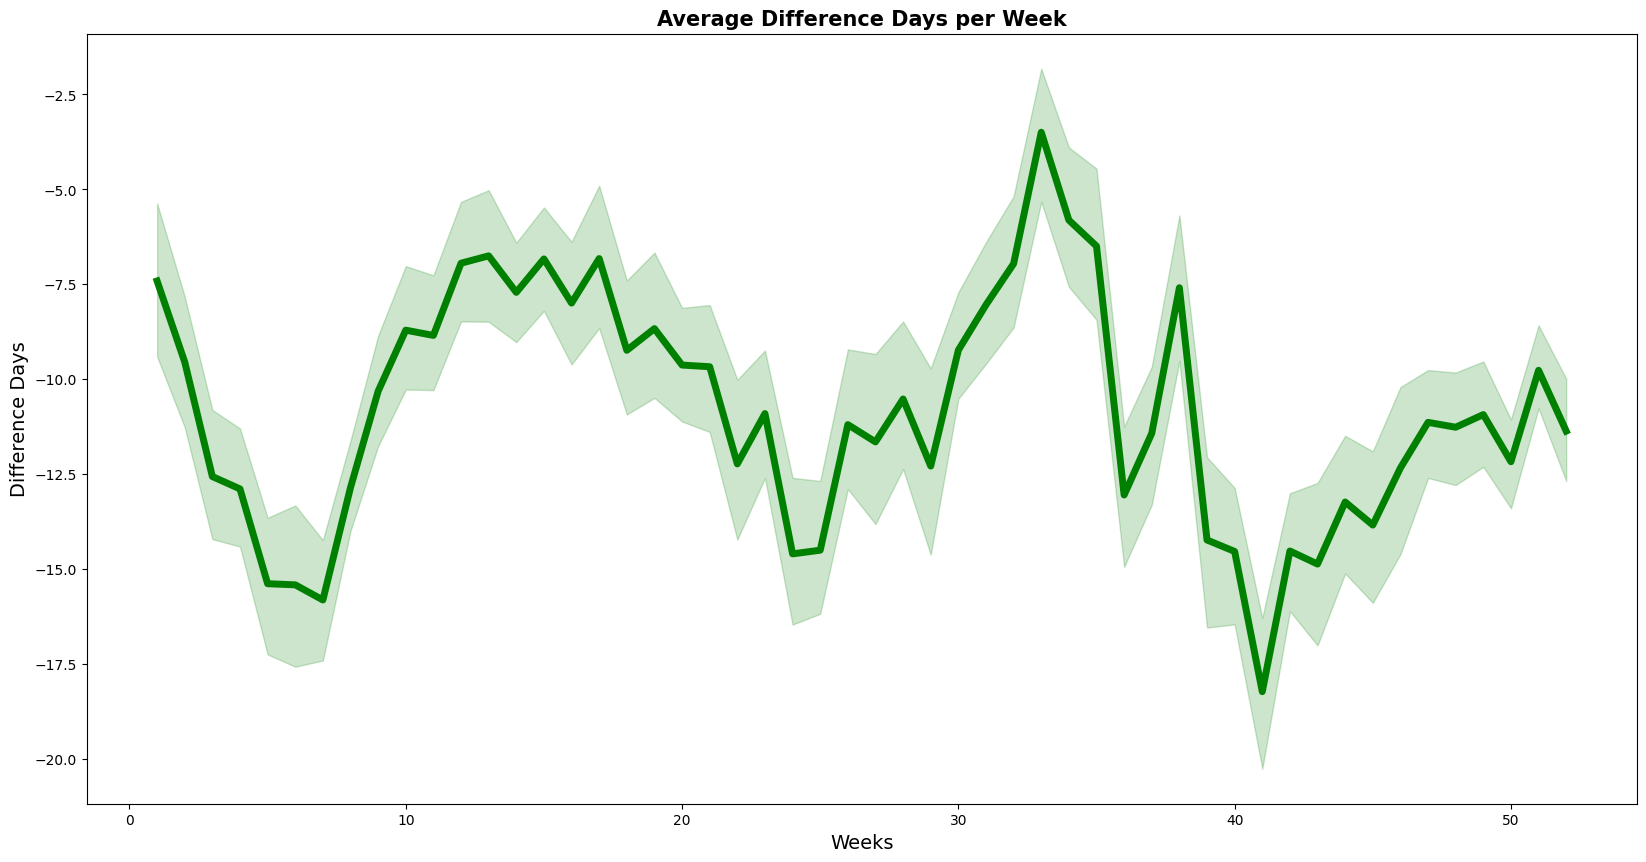

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(x='weekly', y='diff_days', data=Orders, color="Green", linewidth=5, markers=True, dashes=False, estimator='mean')
plt.xlabel("Weeks", size=14)
plt.ylabel("Difference Days", size=14)
plt.title("Average Difference Days per Week", size=15, weight='bold')

###### Above graph shows that the earliest and latest deliveries. According to that, we can say that all deliveries made before their estimated date.

In [20]:
Products = pd.read_csv(r"D:\BA\Python\Basic Exercises\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\PRODUCTS.csv")
Products.head() 

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [21]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [22]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [23]:
Products.dropna(inplace = True)

In [24]:
Products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [25]:
Sellers = pd.read_csv(r"D:\BA\Python\Basic Exercises\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\SELLERS.csv")
Sellers.head() 

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [26]:
Sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [27]:
Sellers.isnull().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [28]:
Sellers.dropna(inplace = True)

In [29]:
Sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [30]:
data = pd.merge(Customers, Orders, on="customer_id", how='inner')
data = data.merge(Order_rev_ratings, on="order_id", how='inner')
data = data.merge(Order_Items, on="order_id", how='inner')
data = data.merge(Products, on="product_id", how='inner')
data = data.merge(Order_Pays, on="order_id", how='inner')
data = data.merge(Sellers, on='seller_id', how='inner')
## data = data.merge(Geo_Location, on='geolocation_zip_code_prefix', how='inner')
data.shape

(114960, 42)

In [31]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,54.0,64.0,31.0,1,credit_card,2,146.87,8577,Vijayawada,Andhra Pradesh
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,54.0,64.0,31.0,1,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,54.0,64.0,31.0,1,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,54.0,64.0,31.0,1,credit_card,7,140.61,8577,Vijayawada,Andhra Pradesh
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,54.0,64.0,31.0,1,credit_card,10,137.58,8577,Vijayawada,Andhra Pradesh


In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,114960.0,35026.008925,29795.869341,1003.00,11320.00,24315.00,58415.00,99980.00
weekly,114960.0,24.948104,13.787194,1.00,14.00,24.00,34.00,52.00
diff_days,114960.0,-11.047921,34.418618,-569.00,-17.00,-13.00,-7.00,635.00
review_score,114960.0,4.017824,1.397347,1.00,4.00,5.00,5.00,5.00
order_item_id,114960.0,1.197408,0.703162,1.00,1.00,1.00,1.00,21.00
price,114960.0,119.528443,182.261795,0.85,39.90,74.00,130.00,6735.00
freight_value,114960.0,19.936838,15.649551,0.00,13.07,16.28,21.15,409.68
product_name_lenght,114960.0,48.783107,10.046523,5.00,42.00,52.00,57.00,76.00
product_description_lenght,114960.0,784.077531,650.581227,4.00,345.00,600.00,982.00,3992.00
product_photos_qty,114960.0,2.206855,1.722896,1.00,1.00,1.00,3.00,20.00


In [33]:
data.describe(include = 'object').T

,count,unique,top,freq
customer_id,114960,95898,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,114960,92794,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,114960,4072,Akkarampalle,18157
customer_state,114960,20,Andhra Pradesh,70690
order_id,114960,95898,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,114960,7,delivered,112510
order_purchase_timestamp,114960,85940,8/8/2017 20:26,63
order_approved_at,114946,49301,1/10/2018 10:32,118
order_delivered_carrier_date,113761,60090,8/10/2017 11:58,63
order_delivered_customer_date,114960,74004,8/14/2017 12:46,63


#### 1. Perform Detailed exploratory analysis
#### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [34]:
total_order_value= (data['price'] + data['freight_value']).sum()
total_order_value

16032928.67

In [35]:
total_payment_value = data['payment_value'].sum() 
total_payment_value

19729551.45

In [36]:
Revenue = round(total_payment_value - total_order_value,2)
print('Total Revenue is :', Revenue)

Total Revenue is : 3696622.78


In [37]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,54.0,64.0,31.0,1,credit_card,2,146.87,8577,Vijayawada,Andhra Pradesh
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,54.0,64.0,31.0,1,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,54.0,64.0,31.0,1,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,54.0,64.0,31.0,1,credit_card,7,140.61,8577,Vijayawada,Andhra Pradesh
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,54.0,64.0,31.0,1,credit_card,10,137.58,8577,Vijayawada,Andhra Pradesh


In [38]:
Total_Sellers = len(pd.unique(data['seller_id']))
Total_Products = len(pd.unique(data['product_id']))
Total_categories = len(pd.unique(data['product_category_name']))
payment_type  = len(pd.unique(data['payment_type']))
Total_Location = len(pd.unique(Geo_Location['geolocation_zip_code_prefix']))
Total_City = len(pd.unique(data['customer_city']))
Total_States = len(pd.unique(data['customer_state']))
Seller_City = len(pd.unique(data['seller_city']))
Seller_States = len(pd.unique(data['seller_state']))

print('Total Sellers are : ', Total_Sellers)
print('Total Locations are : ', Total_Location)
print('Total Products are : ', Total_Products)
print('Total Categories are : ', Total_categories)
print('Total Payment methods are : ', payment_type)
print('Total customers cities are : ', Total_City)
print('Total Customers states are : ', Total_States)
print('Total Sellers cities are : ', Seller_City)
print('Total Sellers states are : ', Seller_States)

Total Sellers are :  2976
Total Locations are :  19015
Total Products are :  31783
Total Categories are :  71
Total Payment methods are :  4
Total customers cities are :  4072
Total Customers states are :  20
Total Sellers cities are :  527
Total Sellers states are :  19


In [39]:
Total_Quatity = data.groupby(['product_category_name','product_id'])['order_item_id'].sum()
print('Total Quantity of products :', Total_Quatity.sum())

Total Quantity of products : 137654


#### b. Understanding how many new customers acquired every month

In [40]:
grouping = data.groupby('customer_id')['yearly_M']
grouping.head()

0         2017-05
1         2017-11
2         2017-11
3         2017-05
4         2018-02
           ...   
114955    2017-12
114956    2018-08
114957    2018-08
114958    2017-12
114959    2017-12
Name: yearly_M, Length: 113650, dtype: object

In [41]:
data['CohortMonth'] = grouping.transform('min')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,CohortMonth
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,64.0,31.0,1,credit_card,2,146.87,8577,Vijayawada,Andhra Pradesh,2017-05
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,64.0,31.0,1,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh,2017-11
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,64.0,31.0,1,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh,2017-11
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,64.0,31.0,1,credit_card,7,140.61,8577,Vijayawada,Andhra Pradesh,2017-05
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,64.0,31.0,1,credit_card,10,137.58,8577,Vijayawada,Andhra Pradesh,2018-02


In [42]:
Monthly_acq = data.groupby('yearly_M')['CohortMonth'].count()
Monthly_acq

yearly_M
2016-10     260
2016-11      90
2016-12       4
2017-01     347
2017-02    1640
2017-03    2873
2017-04    2119
2017-05    4397
2017-06    3864
2017-07    4175
2017-08    5239
2017-09    4699
2017-10    5475
2017-11    5664
2017-12    8617
2018-01    7661
2018-02    6894
2018-03    8253
2018-04    9262
2018-05    8504
2018-06    8338
2018-07    6799
2018-08    9725
2018-09      58
2018-10       3
Name: CohortMonth, dtype: int64

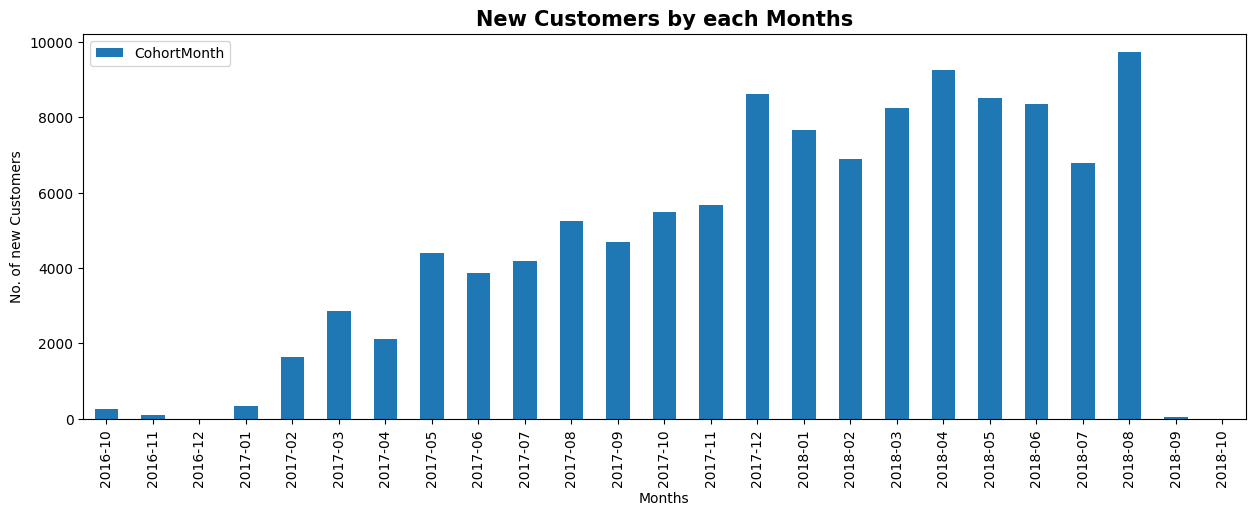

In [43]:
Monthly_acq.plot(kind = 'bar', figsize = (15,5), legend = True)
plt.xlabel('Months')
plt.ylabel('No. of new Customers')
plt.title('New Customers by each Months', size=15, weight='bold')
plt.show()

#### c. Understand the retention of customers on month on month basis

In [44]:
data['delivered_time'] = pd.to_datetime(data['delivered_time'], format = '%Y-%m-%d')
data['CohortMonth'] = pd.to_datetime(data['CohortMonth'], format = '%Y-%m')
data['yearly_M1'] = pd.to_datetime(data['yearly_M'], format = '%Y-%m')

In [45]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    date = df[column].dt.date
    return year, month, date

delivered_year, delivered_month, _ = get_date_int(data, 'yearly_M1')
Cohort_Year, Cohort_Month , _ = get_date_int(data, 'CohortMonth')

Year_Diff = delivered_year - Cohort_Year
Month_Diff = delivered_month - Cohort_Month
data['CohortIndex'] = Year_Diff*12 + Month_Diff +1
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,CohortMonth,yearly_M1,CohortIndex
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,1,credit_card,2,146.87,8577,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,1,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,1,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,1,credit_card,7,140.61,8577,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,1,credit_card,10,137.58,8577,Vijayawada,Andhra Pradesh,2018-02-01,2018-02-01,1


In [46]:
group1 = data.groupby(['CohortMonth', 'CohortIndex'])
group1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,CohortMonth,yearly_M1,CohortIndex
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,1,credit_card,2,146.87,8577,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,1,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,1,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,1,credit_card,7,140.61,8577,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,1,credit_card,10,137.58,8577,Vijayawada,Andhra Pradesh,2018-02-01,2018-02-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,033fab69968b0d69099d64423831a236,fc0bcca3d8d90a812b707bb8e45069d6,29278,Cherthala,Kerala,7e708aed151d6a8601ce8f2eaa712bf4,delivered,6/2/2018 18:37,6/2/2018 18:51,6/4/2018 13:42,...,1,credit_card,2,44.63,14940,Tarsali,Gujarat,2018-10-01,2018-10-01,1
78441,75e8f990b9e289013b1d092614b52487,2bf93b9956e26356b52f5d426c7801de,3275,Akkarampalle,Andhra Pradesh,5cc475c7c03290048eb2e742cd64cb5e,delivered,10/4/2016 21:54,10/5/2016 3:10,12/6/2016 17:24,...,1,UPI,1,82.69,14092,Chirala,Andhra Pradesh,2016-12-01,2016-12-01,1
90200,27ae7c8a8fc20ce80d96f01b6f19961b,232422c2db1f7c69daf3b0f0421ebb43,29278,Cherthala,Kerala,450cb96c63e1e5b49d34f223f67976d2,delivered,5/21/2018 6:48,5/21/2018 6:57,6/1/2018 13:14,...,1,credit_card,5,201.96,30315,Anantapur,Andhra Pradesh,2018-10-01,2018-10-01,1
95192,0975c3cf2e418ebfa5d1191a2dffd59d,f7b981e8a280e455ac3cbe0d5d171bd1,80030,Anakapalle,Andhra Pradesh,bd50a7fe9fd97ea4b7663031a319e150,delivered,12/23/2016 23:16,12/23/2016 23:31,12/27/2016 6:14,...,1,credit_card,1,19.62,81130,Anakapalle,Andhra Pradesh,2016-12-01,2016-12-01,1


In [47]:
cohort_data = group1['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,customer_id
0,2016-10-01,1,211
1,2016-11-01,1,62
2,2016-12-01,1,4
3,2017-01-01,1,287
4,2017-02-01,1,1322


In [48]:
Recurring_Cust = cohort_data.pivot(index="CohortMonth", columns="CohortIndex", values="customer_id")
Recurring_Cust

CohortIndex,1
CohortMonth,
2016-10-01,211
2016-11-01,62
2016-12-01,4
2017-01-01,287
2017-02-01,1322
2017-03-01,2342
2017-04-01,1799
2017-05-01,3670
2017-06-01,3180


In [49]:
Recurring_Cust.sum()

CohortIndex
1    95898
dtype: int64

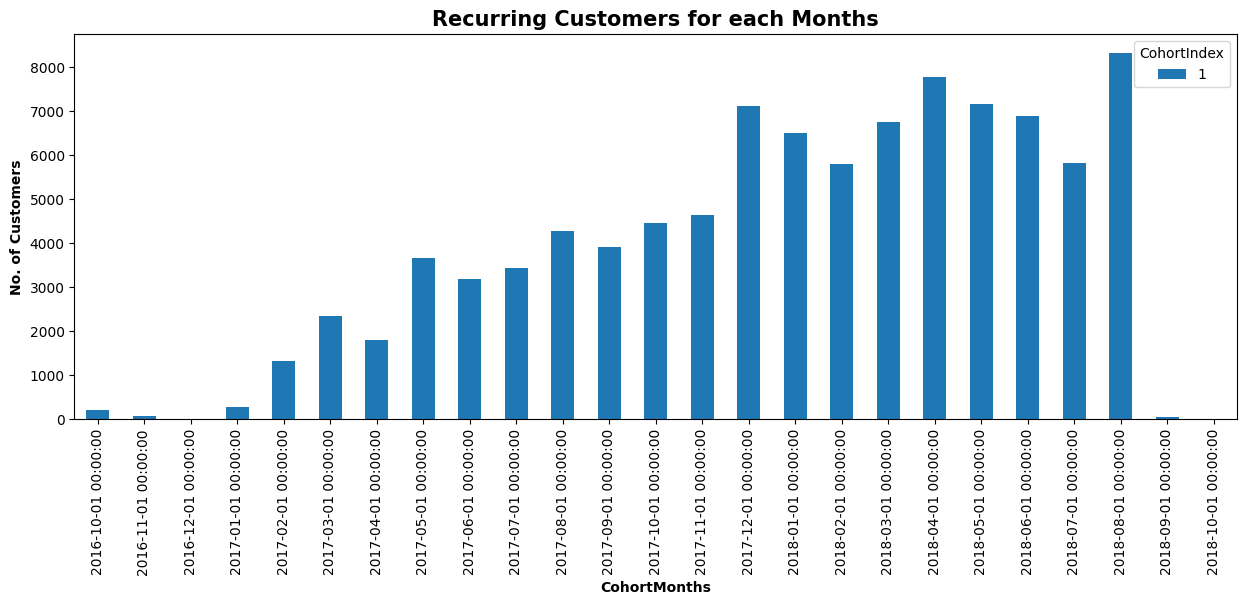

In [50]:
Recurring_Cust.plot(kind = 'bar', figsize = (15,5), legend = True)
plt.xlabel('CohortMonths', weight='bold')
plt.ylabel('No. of Customers', weight='bold')
plt.title('Recurring Customers for each Months', size=15, weight='bold')
plt.show()

#### d. How the revenues from existing/new customers on month on month basis

In [51]:
data['tot_price'] = data['price'] + data['freight_value']
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,CohortMonth,yearly_M1,CohortIndex,tot_price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,credit_card,2,146.87,8577,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1,137.89
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,credit_card,1,275.79,8577,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1,137.89
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,credit_card,7,140.61,8577,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1,140.61
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,credit_card,10,137.58,8577,Vijayawada,Andhra Pradesh,2018-02-01,2018-02-01,1,137.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114955,d21101a81657215bf9d86ccc3da340a1,9ba58a98da1d0abf0bd1e422e06c9051,18650,Kanor,Rajasthan,d35703faec55cda0ceeb4f50a4d584ae,canceled,7/16/2018 22:08,7/16/2018 22:20,NaN,...,credit_card,5,252.27,9895,Adoni,Andhra Pradesh,2017-12-01,2017-12-01,1,252.27
114956,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,Uchgaon,Maharashtra,b494f624c631105b24fe497277085909,delivered,8/1/2018 18:58,8/2/2018 18:50,8/3/2018 15:39,...,credit_card,3,72.18,87015,Siddipet,Andhra Pradesh,2018-08-01,2018-08-01,1,72.18
114957,b90b857a277b080d8078332b3636ab58,7f5f43a9394964ac51bc5d1e0204ead4,76400,Dundahera,Haryana,d76fe905f4588ad69ab3b36527bb267d,delivered,8/18/2018 20:59,8/18/2018 21:10,8/20/2018 16:49,...,credit_card,6,224.44,83015,Chunchupalle,Andhra Pradesh,2018-08-01,2018-08-01,1,224.44
114958,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,Jalda,Orissa,51c6d2f460589fa7b65f2da51e860206,delivered,11/14/2017 12:04,11/14/2017 12:15,11/27/2017 20:44,...,credit_card,5,167.79,12914,Koratla,Andhra Pradesh,2017-12-01,2017-12-01,1,199.92


In [52]:
data['Customer_rev'] =  round(data['payment_value'] - data['tot_price'],2)
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,CohortMonth,yearly_M1,CohortIndex,tot_price,Customer_rev
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,2,146.87,8577,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1,146.87,0.00
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,1,275.79,8577,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1,137.89,137.90
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,1,275.79,8577,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1,137.89,137.90
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,7,140.61,8577,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1,140.61,0.00
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,10,137.58,8577,Vijayawada,Andhra Pradesh,2018-02-01,2018-02-01,1,137.58,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114955,d21101a81657215bf9d86ccc3da340a1,9ba58a98da1d0abf0bd1e422e06c9051,18650,Kanor,Rajasthan,d35703faec55cda0ceeb4f50a4d584ae,canceled,7/16/2018 22:08,7/16/2018 22:20,NaN,...,5,252.27,9895,Adoni,Andhra Pradesh,2017-12-01,2017-12-01,1,252.27,0.00
114956,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,Uchgaon,Maharashtra,b494f624c631105b24fe497277085909,delivered,8/1/2018 18:58,8/2/2018 18:50,8/3/2018 15:39,...,3,72.18,87015,Siddipet,Andhra Pradesh,2018-08-01,2018-08-01,1,72.18,0.00
114957,b90b857a277b080d8078332b3636ab58,7f5f43a9394964ac51bc5d1e0204ead4,76400,Dundahera,Haryana,d76fe905f4588ad69ab3b36527bb267d,delivered,8/18/2018 20:59,8/18/2018 21:10,8/20/2018 16:49,...,6,224.44,83015,Chunchupalle,Andhra Pradesh,2018-08-01,2018-08-01,1,224.44,0.00
114958,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,Jalda,Orissa,51c6d2f460589fa7b65f2da51e860206,delivered,11/14/2017 12:04,11/14/2017 12:15,11/27/2017 20:44,...,5,167.79,12914,Koratla,Andhra Pradesh,2017-12-01,2017-12-01,1,199.92,-32.13


In [53]:
Month_rev = data.pivot_table(index = 'yearly_M',values = 'Customer_rev', aggfunc = 'sum')

In [54]:
Month_rev

,Customer_rev
yearly_M,
2016-10,10576.22
2016-11,3983.41
2016-12,0.00
2017-01,6493.75
2017-02,49546.66
2017-03,63260.18
2017-04,46001.84
2017-05,84528.70
2017-06,86144.61


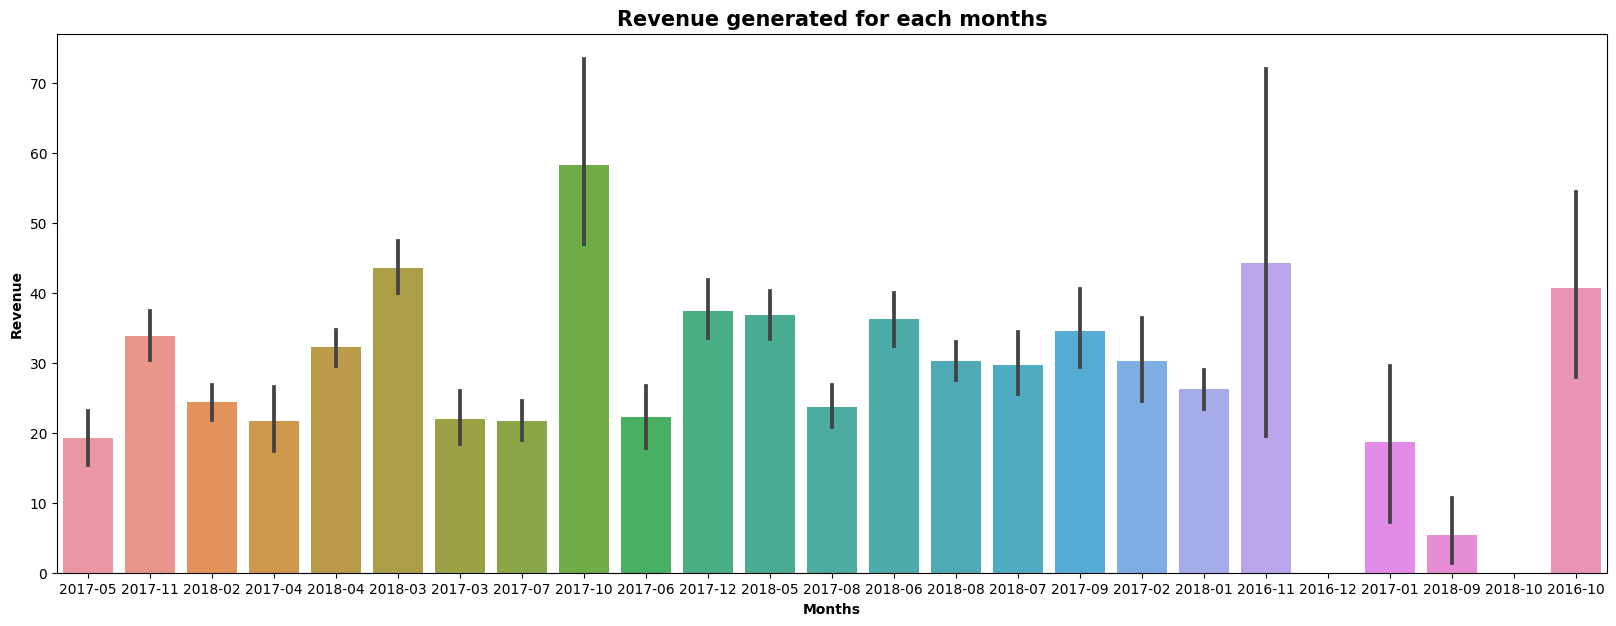

In [55]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(data, x = data.yearly_M, y = data.Customer_rev, ax = ax)
plt.xlabel('Months', weight='bold')
plt.ylabel('Revenue', weight='bold')
plt.title('Revenue generated for each months', size=15, weight='bold')
plt.show()

<AxesSubplot: ylabel='yearly_M'>

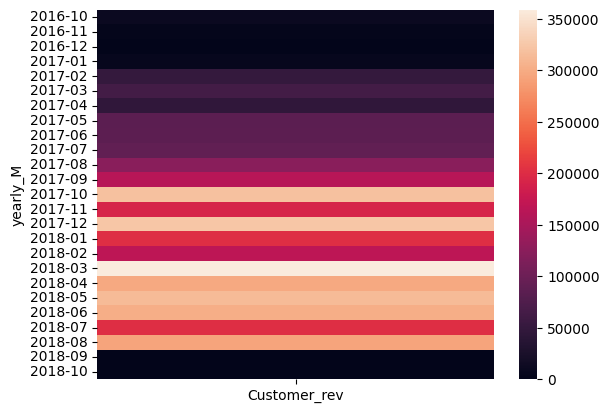

In [56]:
sns.heatmap(Month_rev)

#### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [57]:
data['year'] = pd.to_datetime(data['yearly_M'], format = '%Y-%m').dt.year

In [58]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,CohortMonth,yearly_M1,CohortIndex,tot_price,Customer_rev,year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,146.87,8577,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1,146.87,0.0,2017
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,275.79,8577,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1,137.89,137.9,2017
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,275.79,8577,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1,137.89,137.9,2017
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,140.61,8577,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1,140.61,0.0,2017
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,137.58,8577,Vijayawada,Andhra Pradesh,2018-02-01,2018-02-01,1,137.58,0.0,2018


In [59]:
yr_sales = data.groupby('year')['payment_value'].sum()
yr_sales

year
2016       65034.44
2017     8342615.15
2018    11321901.86
Name: payment_value, dtype: float64

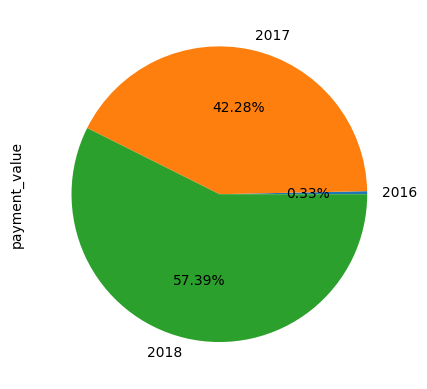

In [60]:
yr_sales.plot(kind = 'pie', labels = yr_sales.index, autopct = '%1.2f%%', startangle = 360)
plt.show()

In [61]:
Cat_qunty = pd.pivot_table(data,index = 'product_category_name',values = (['order_item_id','payment_value']),aggfunc = 'sum').sort_values(by = 'payment_value',ascending=False).reset_index()
Cat_qunty.head()

,product_category_name,order_item_id,payment_value
0,Bed_Bath_Table,14767,1740846.54
1,Health_Beauty,11400,1652965.51
2,Computers_Accessories,10104,1563864.87
3,Furniture_Decor,12071,1436595.36
4,Watches_Gifts,6819,1429366.57


In [62]:
Sales_by_Location = data.groupby(Geo_Location['geolocation_state'])['payment_value'].sum().reset_index().sort_values(by = 'payment_value',ascending=False)
Sales_by_Location

,geolocation_state,payment_value
0,Andhra Pradesh,1924450.53
5,Gujarat,191834.45
2,Chhattisgarh,144225.00
9,Karnataka,104747.10
16,Tamil Nadu,98362.76
3,Delhi,81838.04
17,Uttar Pradesh,80446.72
11,Madhya Pradesh,76201.56
12,Maharashtra,57976.84
19,West Bengal,42254.16


In [63]:
S1 =Sales_by_Location.head(10)
S1

,geolocation_state,payment_value
0,Andhra Pradesh,1924450.53
5,Gujarat,191834.45
2,Chhattisgarh,144225.00
9,Karnataka,104747.10
16,Tamil Nadu,98362.76
3,Delhi,81838.04
17,Uttar Pradesh,80446.72
11,Madhya Pradesh,76201.56
12,Maharashtra,57976.84
19,West Bengal,42254.16


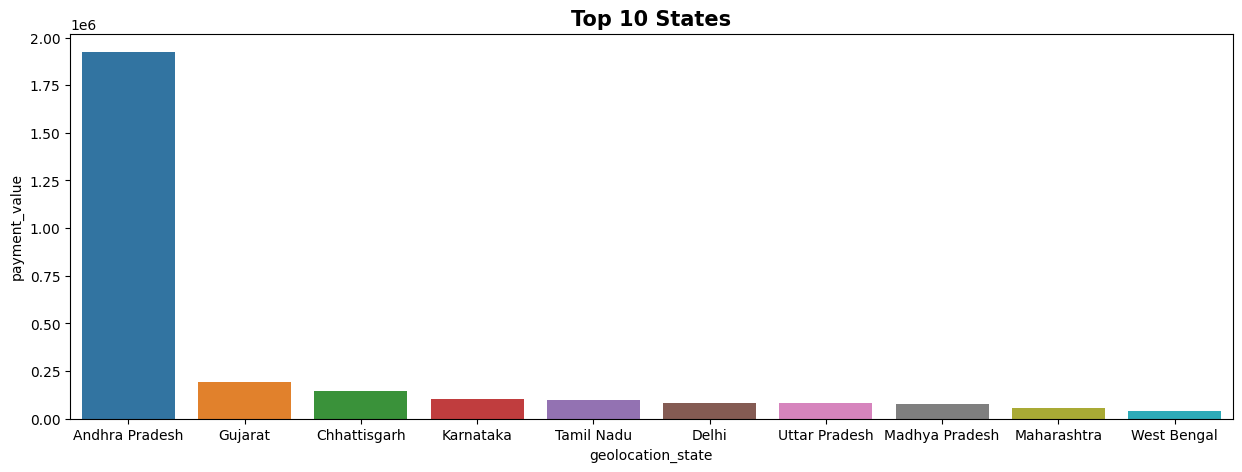

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(S1, x= 'geolocation_state', y = 'payment_value', ax = ax)
plt.title('Top 10 States', size=15, weight='bold')
plt.show()

In [65]:
Sales_by_City = data.groupby([Geo_Location['geolocation_state'],Geo_Location['geolocation_city']])['payment_value'].sum().reset_index().sort_values(by = 'payment_value',ascending=False)
Sales_by_City.head()

,geolocation_state,geolocation_city,payment_value
2,Andhra Pradesh,Akkarampalle,1163161.26
10,Andhra Pradesh,Badepalle,80340.06
40,Andhra Pradesh,Eddumailaram,60954.47
19,Andhra Pradesh,Bheemunipatnam,47245.42
131,Andhra Pradesh,Pedana,39211.46


In [66]:
S2 = Sales_by_City.head(10)
S2

,geolocation_state,geolocation_city,payment_value
2,Andhra Pradesh,Akkarampalle,1163161.26
10,Andhra Pradesh,Badepalle,80340.06
40,Andhra Pradesh,Eddumailaram,60954.47
19,Andhra Pradesh,Bheemunipatnam,47245.42
131,Andhra Pradesh,Pedana,39211.46
7,Andhra Pradesh,Anakapalle,34046.50
8,Andhra Pradesh,Anantapur,29098.84
39,Andhra Pradesh,Dowleswaram,26148.45
14,Andhra Pradesh,Bestavaripeta,22154.90
257,Chhattisgarh,Gaurella,16434.00


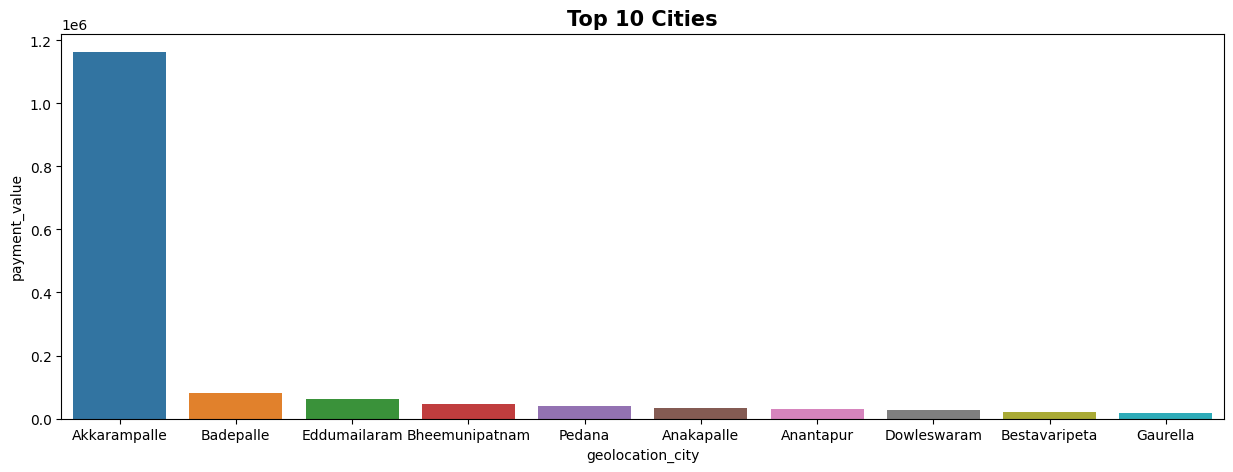

In [67]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(S2, x= 'geolocation_city', y = 'payment_value', ax = ax)
plt.title('Top 10 Cities', size=15, weight='bold')
plt.show()

In [68]:
data['days'] = pd.to_datetime(data['delivered_time']).dt.day
data['time'] = pd.to_datetime(data['order_delivered_customer_date']).dt.time
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_city,seller_state,CohortMonth,yearly_M1,CohortIndex,tot_price,Customer_rev,year,days,time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1,146.87,0.00,2017,25,10:35:00
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1,137.89,137.90,2017,28,00:09:00
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,Vijayawada,Andhra Pradesh,2017-11-01,2017-11-01,1,137.89,137.90,2017,28,00:09:00
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,Vijayawada,Andhra Pradesh,2017-05-01,2017-05-01,1,140.61,0.00,2017,26,09:54:00
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,Vijayawada,Andhra Pradesh,2018-02-01,2018-02-01,1,137.58,0.00,2018,28,21:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114955,d21101a81657215bf9d86ccc3da340a1,9ba58a98da1d0abf0bd1e422e06c9051,18650,Kanor,Rajasthan,d35703faec55cda0ceeb4f50a4d584ae,canceled,7/16/2018 22:08,7/16/2018 22:20,NaN,...,Adoni,Andhra Pradesh,2017-12-01,2017-12-01,1,252.27,0.00,2017,13,23:35:00
114956,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,Uchgaon,Maharashtra,b494f624c631105b24fe497277085909,delivered,8/1/2018 18:58,8/2/2018 18:50,8/3/2018 15:39,...,Siddipet,Andhra Pradesh,2018-08-01,2018-08-01,1,72.18,0.00,2018,13,23:16:00
114957,b90b857a277b080d8078332b3636ab58,7f5f43a9394964ac51bc5d1e0204ead4,76400,Dundahera,Haryana,d76fe905f4588ad69ab3b36527bb267d,delivered,8/18/2018 20:59,8/18/2018 21:10,8/20/2018 16:49,...,Chunchupalle,Andhra Pradesh,2018-08-01,2018-08-01,1,224.44,0.00,2018,28,18:16:00
114958,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,Jalda,Orissa,51c6d2f460589fa7b65f2da51e860206,delivered,11/14/2017 12:04,11/14/2017 12:15,11/27/2017 20:44,...,Koratla,Andhra Pradesh,2017-12-01,2017-12-01,1,199.92,-32.13,2017,19,19:37:00


In [69]:
Sales_by_time = pd.pivot_table(data,index = ['yearly_M','weekly','days','time'], values = 'payment_value', aggfunc = 'sum')
Sales_by_time

payment_value
yearly_M weekly days time                   
2016-10  41     11   13:46:00         202.88
                     14:46:00         111.51
                13   03:10:00         140.13
                     07:45:00         161.65
                     15:44:00         349.66
...                                      ...
2018-09  39     25   00:47:00          65.35
                27   02:24:00         265.94
2018-10  40     2    00:18:00         101.36
         41     11   16:41:00         201.96
         42     17   13:22:00          44.63

[74004 rows x 1 columns]

In [70]:
Sales_paymethod = pd.pivot_table(data, index ='payment_type', values = 'payment_value', aggfunc = 'sum').sort_values(by = 'payment_value', ascending=False)
Sales_paymethod

,payment_value
payment_type,
credit_card,15146320.82
UPI,3945476.92
voucher,394896.26
debit_card,242857.45


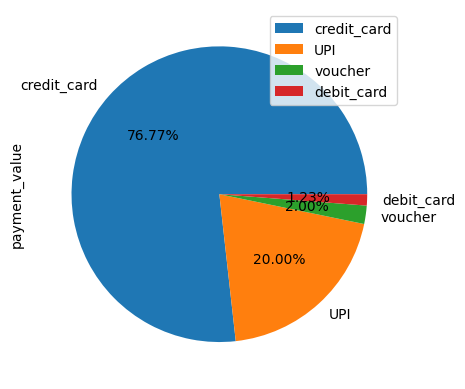

In [71]:
Sales_paymethod.plot(kind = 'pie', labels = Sales_paymethod.index, autopct = '%1.2f%%', startangle = 360,subplots=True)
plt.show()

#### f. Popular Products by month, seller, state, category.

In [72]:
len(data['product_id'].unique())

31783

In [73]:
data['product_id_short'] = data['product_id'].str[-8:]
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,CohortMonth,yearly_M1,CohortIndex,tot_price,Customer_rev,year,days,time,product_id_short
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,Andhra Pradesh,2017-05-01,2017-05-01,1,146.87,0.00,2017,25,10:35:00,b10169e8
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,Andhra Pradesh,2017-11-01,2017-11-01,1,137.89,137.90,2017,28,00:09:00,b10169e8
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,Andhra Pradesh,2017-11-01,2017-11-01,1,137.89,137.90,2017,28,00:09:00,b10169e8
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,Andhra Pradesh,2017-05-01,2017-05-01,1,140.61,0.00,2017,26,09:54:00,b10169e8
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,Andhra Pradesh,2018-02-01,2018-02-01,1,137.58,0.00,2018,28,21:09:00,b10169e8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114955,d21101a81657215bf9d86ccc3da340a1,9ba58a98da1d0abf0bd1e422e06c9051,18650,Kanor,Rajasthan,d35703faec55cda0ceeb4f50a4d584ae,canceled,7/16/2018 22:08,7/16/2018 22:20,NaN,...,Andhra Pradesh,2017-12-01,2017-12-01,1,252.27,0.00,2017,13,23:35:00,589251c0
114956,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,Uchgaon,Maharashtra,b494f624c631105b24fe497277085909,delivered,8/1/2018 18:58,8/2/2018 18:50,8/3/2018 15:39,...,Andhra Pradesh,2018-08-01,2018-08-01,1,72.18,0.00,2018,13,23:16:00,9a334261
114957,b90b857a277b080d8078332b3636ab58,7f5f43a9394964ac51bc5d1e0204ead4,76400,Dundahera,Haryana,d76fe905f4588ad69ab3b36527bb267d,delivered,8/18/2018 20:59,8/18/2018 21:10,8/20/2018 16:49,...,Andhra Pradesh,2018-08-01,2018-08-01,1,224.44,0.00,2018,28,18:16:00,68c91676
114958,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,Jalda,Orissa,51c6d2f460589fa7b65f2da51e860206,delivered,11/14/2017 12:04,11/14/2017 12:15,11/27/2017 20:44,...,Andhra Pradesh,2017-12-01,2017-12-01,1,199.92,-32.13,2017,19,19:37:00,3786b8a1


In [74]:
Top_prod_by_state = data.groupby([Geo_Location['geolocation_state'],data['product_id_short']])['product_id'].count().reset_index().sort_values(by = 'product_id',ascending=False).head(10)
Top_prod_by_state

,geolocation_state,product_id_short,product_id
458,Andhra Pradesh,339b6058,528
2158,Andhra Pradesh,f1519f73,310
1003,Andhra Pradesh,70e7f83d,255
658,Andhra Pradesh,499d9c6b,204
1594,Andhra Pradesh,b2793310,188
1348,Andhra Pradesh,97a372db,138
1067,Andhra Pradesh,7758a2a6,121
1131,Andhra Pradesh,7e92672c,118
443,Andhra Pradesh,32269894,117
1722,Andhra Pradesh,be4c7fab,115


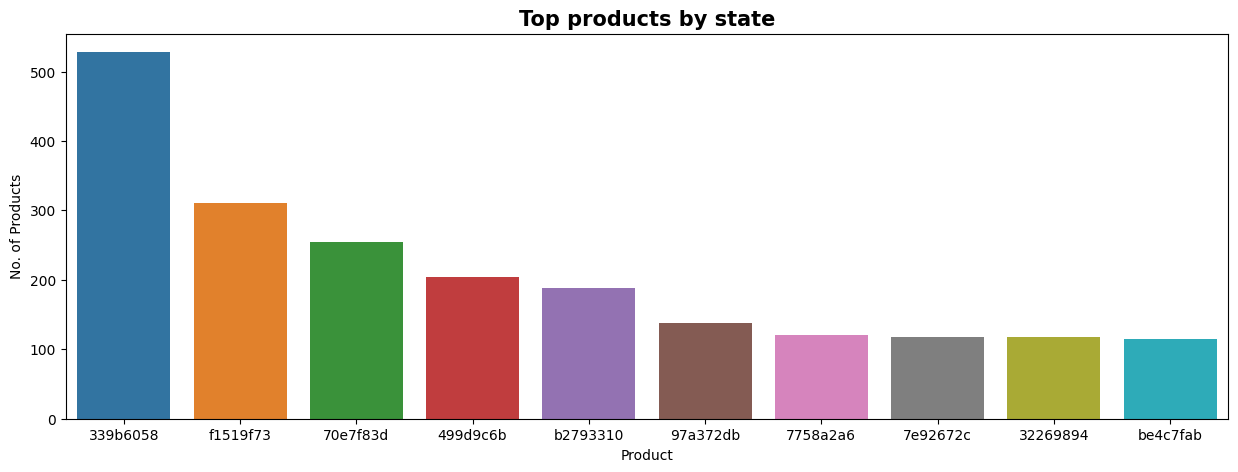

In [75]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(Top_prod_by_state, x ='product_id_short', y = 'product_id',ax = ax)
plt.xlabel('Product')
plt.ylabel('No. of Products')
plt.title('Top products by state',size=15, weight='bold')
plt.show()

In [76]:
Top_prod_by_Cat = data.groupby(['product_category_name','product_id_short'])['product_id'].count().reset_index().sort_values(by = 'product_id',ascending=False).head(10)
Top_prod_by_Cat

,product_category_name,product_id_short,product_id
12719,Furniture_Decor,314663af,536
3686,Bed_Bath_Table,339b6058,528
15329,Garden_Tools,70e7f83d,508
15213,Garden_Tools,499d9c6b,406
15443,Garden_Tools,97a372db,398
15698,Garden_Tools,f1519f73,391
7838,Computers_Accessories,c61f2ac4,357
31577,Watches_Gifts,d6772e08,327
16186,Health_Beauty,2e5804a6,295
7818,Computers_Accessories,c1e95ad7,278


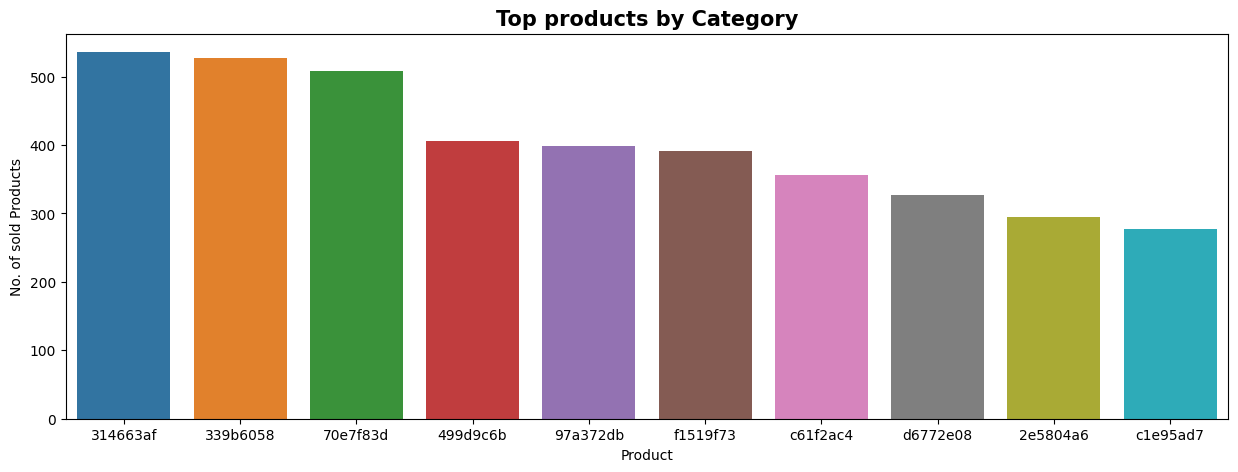

In [77]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(Top_prod_by_Cat, x ='product_id_short', y = 'product_id',ax = ax)
plt.xlabel('Product')
plt.ylabel('No. of sold Products')
plt.title('Top products by Category',size=15, weight='bold')
plt.show()

In [78]:
Top_prod_by_Seller = data.groupby(['seller_id','product_id_short']).agg({'product_id': 'count'}).rename(columns = {'product_id':'COUNT'}).reset_index().sort_values(by = 'COUNT',ascending=False).head(10)
Top_prod_by_Seller

,seller_id,product_id_short,COUNT
20144,955fee9216a65b617aa5c0531780ce60,314663af,536
9228,4a3ca9315b744ce9f8e9374361493884,339b6058,522
4324,1f50f920176fa81dab994f9023523100,70e7f83d,508
4318,1f50f920176fa81dab994f9023523100,499d9c6b,406
4328,1f50f920176fa81dab994f9023523100,97a372db,398
4333,1f50f920176fa81dab994f9023523100,f1519f73,391
21375,a1043bafd471dff536d0c462352beb48,c61f2ac4,357
25792,cc419e0650a3c5ba77189a1882b7556a,2e5804a6,295
28980,de722cd6dad950a92b7d4f82673f8833,c1e95ad7,278
25797,cc419e0650a3c5ba77189a1882b7556a,496bc318,275


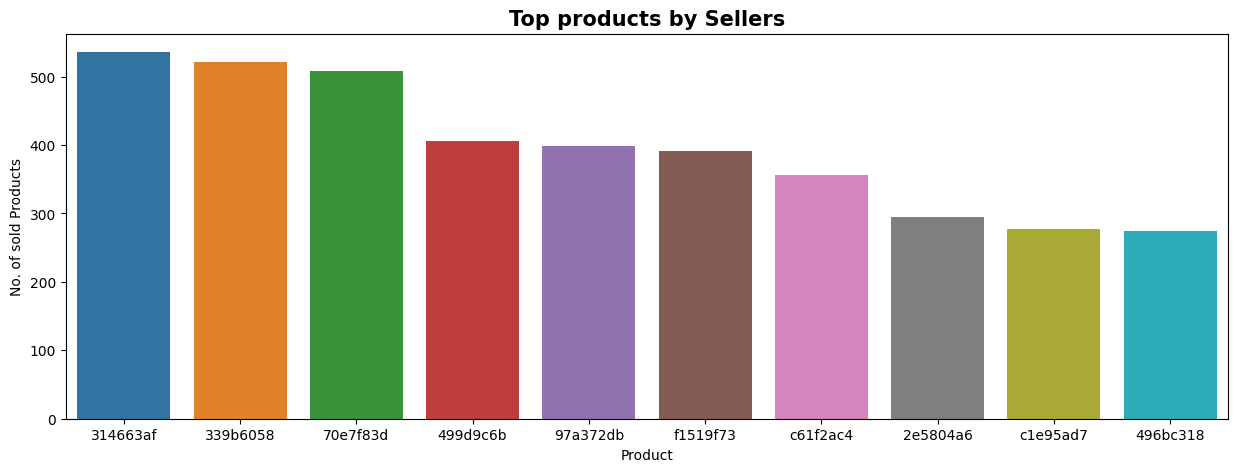

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(Top_prod_by_Seller, x ='product_id_short', y = 'COUNT',ax = ax)
plt.xlabel('Product')
plt.ylabel('No. of sold Products')
plt.title('Top products by Sellers',size=15, weight='bold')
plt.show()

In [80]:
Top_prod_by_Month = data.groupby(['yearly_M','product_id_short'])['product_id'].count().reset_index().sort_values(by = 'product_id',ascending = False).head(10)
Top_prod_by_Month

,yearly_M,product_id_short,product_id
46589,2018-05,d6772e08,162
27657,2018-01,314663af,114
43843,2018-05,314663af,103
24579,2017-12,70e7f83d,101
58619,2018-08,9426f28b,94
39212,2018-04,314663af,79
26676,2017-12,f1519f73,78
44943,2018-05,70e7f83d,72
25201,2017-12,97a372db,69
23911,2017-12,499d9c6b,69


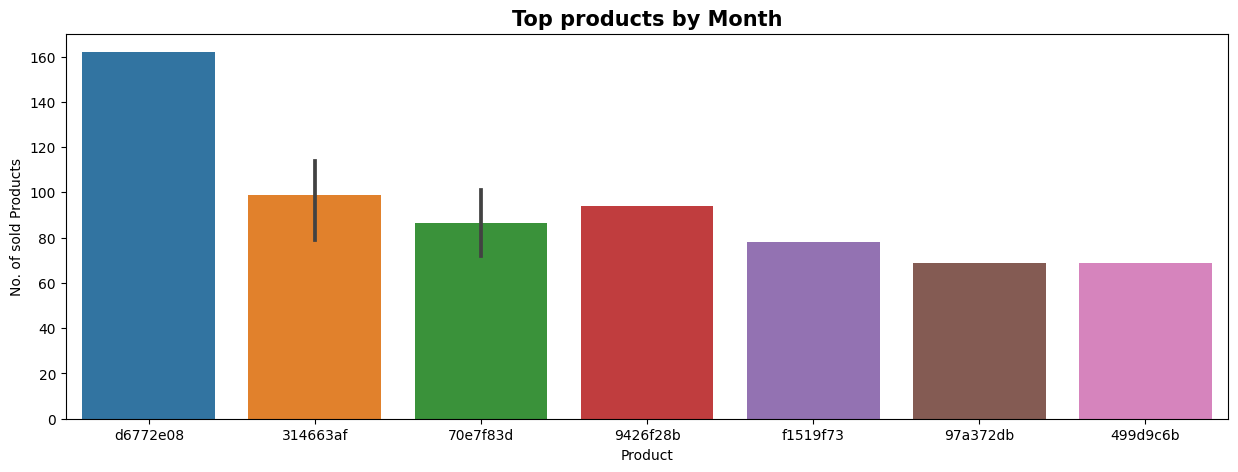

In [81]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(Top_prod_by_Month, x ='product_id_short', y = 'product_id',ax = ax)
plt.xlabel('Product')
plt.ylabel('No. of sold Products')
plt.title('Top products by Month',size=15, weight='bold')
plt.show()

#### g. Popular categories by state, month

In [82]:
data['product_category'] = data['product_category_name']
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,CohortMonth,yearly_M1,CohortIndex,tot_price,Customer_rev,year,days,time,product_id_short,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,2017-05-01,2017-05-01,1,146.87,0.0,2017,25,10:35:00,b10169e8,Office_Furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,2017-11-01,2017-11-01,1,137.89,137.9,2017,28,00:09:00,b10169e8,Office_Furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,2017-11-01,2017-11-01,1,137.89,137.9,2017,28,00:09:00,b10169e8,Office_Furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,2017-05-01,2017-05-01,1,140.61,0.0,2017,26,09:54:00,b10169e8,Office_Furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,2018-02-01,2018-02-01,1,137.58,0.0,2018,28,21:09:00,b10169e8,Office_Furniture


In [83]:
data.groupby(["product_category_name"])["product_id"].count().sort_values(ascending=False)

product_category_name
Bed_Bath_Table               11964
Health_Beauty                 9947
Sports_Leisure                8802
Furniture_Decor               8754
Computers_Accessories         8024
                             ...  
Arts_And_Craftmanship           24
La_Cuisine                      14
Cds_Dvds_Musicals               14
Fashion_Childrens_Clothes        8
Security_And_Services            2
Name: product_id, Length: 71, dtype: int64

In [84]:
Cat_by_Month = data.groupby(['yearly_M',"product_category_name"]).agg({'product_id': 'count'}).rename(columns = {'product_id':'COUNT'}).sort_values(by = 'COUNT',ascending=False)
Cat_by_Month

COUNT
yearly_M product_category_name           
2018-08  Health_Beauty               1093
2018-03  Computers_Accessories        989
2018-06  Bed_Bath_Table               963
2018-04  Bed_Bath_Table               924
2018-06  Health_Beauty                918
...                                   ...
2017-10  Books_Imported                 1
         Construction_Tools_Lights      1
         La_Cuisine                     1
         Music                          1
2018-10  Watches_Gifts                  1

[1273 rows x 1 columns]

In [85]:
most_products= Cat_by_Month.reset_index()

In [86]:
max_category_by_month = most_products[most_products['COUNT']  == most_products.groupby('yearly_M')['COUNT'].transform(max)]
max_category_by_month

,yearly_M,product_category_name,COUNT
0,2018-08,Health_Beauty,1093
1,2018-03,Computers_Accessories,989
2,2018-06,Bed_Bath_Table,963
3,2018-04,Bed_Bath_Table,924
5,2018-01,Bed_Bath_Table,871
7,2017-12,Bed_Bath_Table,855
8,2018-05,Health_Beauty,834
11,2018-07,Health_Beauty,793
14,2018-02,Bed_Bath_Table,760
25,2017-11,Bed_Bath_Table,658


In [87]:
Cat_by_State = data.groupby([Geo_Location['geolocation_state'],data['product_category_name']]).agg({'product_id': 'count'}).rename(columns = {'product_id':'COUNT'}).sort_values(by = 'COUNT',ascending=False)
Cat_by_State

COUNT
geolocation_state product_category_name        
Andhra Pradesh    Bed_Bath_Table           2964
                  Furniture_Decor          1651
                  Office_Furniture         1463
                  Garden_Tools             1396
                  Telephony                 742
...                                         ...
Jammu & Kashmir   Computers_Accessories       1
Orissa            Signaling_And_Security      1
Gujarat           Consoles_Games              1
Jammu & Kashmir   Drinks                      1
Himachal Pradesh  Food                        1

[383 rows x 1 columns]

In [88]:
most_cat = Cat_by_State.reset_index()

In [89]:
max_category_by_state = most_cat[most_cat['COUNT']  == most_cat.groupby(['geolocation_state'])['COUNT'].transform(max)]
max_category_by_state

,geolocation_state,product_category_name,COUNT
0,Andhra Pradesh,Bed_Bath_Table,2964
9,Gujarat,Furniture_Decor,290
13,Chhattisgarh,Bed_Bath_Table,190
14,Karnataka,Furniture_Decor,189
16,Tamil Nadu,Bed_Bath_Table,166
24,Madhya Pradesh,Garden_Tools,119
25,Uttar Pradesh,Bed_Bath_Table,118
26,Delhi,Garden_Tools,116
37,Haryana,Bed_Bath_Table,84
38,Maharashtra,Bed_Bath_Table,82


#### h. List top 10 most expensive products sorted by price

In [90]:
most_exp_products = data.groupby('product_id_short')['price'].max().sort_values(ascending = False).head(10)
most_exp_products

product_id_short
1d4cce7f    6735.00
cb6ed62e    6729.00
7028d6ad    6499.00
f44de961    4799.00
4cee2747    4690.00
c5035f18    4590.00
6aa69c53    4399.87
5e9eef30    4099.99
1f0722f6    4059.00
8fade5c6    3999.90
Name: price, dtype: float64

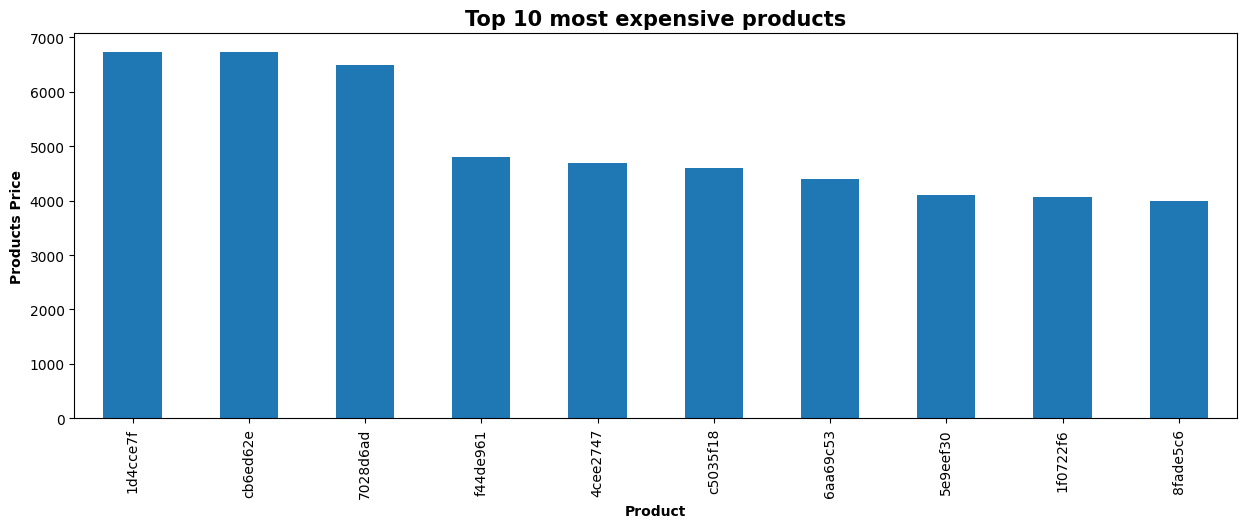

In [91]:
plt.subplots(figsize=(15, 5))
most_exp_products.plot(kind = 'bar')
plt.xlabel('Product', weight='bold')
plt.ylabel('Products Price', weight='bold')
plt.title('Top 10 most expensive products',size=15, weight='bold')
plt.show()

#### 2. Performing Customers/sellers Segmentation
#### a. Divide the customers into groups based on the revenue generated

##### Here, we can consider payment values of products which was paid by the customers as a revenue.

In [92]:
A1 = data['payment_value'].min()
A2 = data['payment_value'].max() 
A3 = data['payment_value'].median() 
A4 = data['payment_value'].quantile(0.25)
A5 = data['payment_value'].quantile(0.75)

print('A1 :', A1)
print('A2 :', A2)
print('A3 :', A3)
print('A4 :', A4)
print('A5 :', A5)

A1 : 0.0
A2 : 13664.08
A3 : 107.78
A4 : 60.72
A5 : 188.74


In [93]:
d1= data['payment_value'].astype(int)
d1

0         146
1         275
2         275
3         140
4         137
         ... 
114955    252
114956     72
114957    224
114958    167
114959     32
Name: payment_value, Length: 114960, dtype: int32

In [94]:
data['groups'] = np.select([(d1 <=13700) & (d1 >= 189),
                                 (d1 <= 189) & (d1 >= 108),
                                 (d1 <= 108) & (d1 >= 61),
                                 (d1 <=61) & (d1 >= 0),(d1<=0)], ['A1', 'A2', 'A3', 'A4','A5'])

In [95]:
Customer_Rev_group = data.groupby('groups')['customer_id'].nunique().sort_values(ascending = False).reset_index()
Customer_Rev_group

,groups,customer_id
0,A3,26377
1,A4,25088
2,A2,24576
3,A1,21168


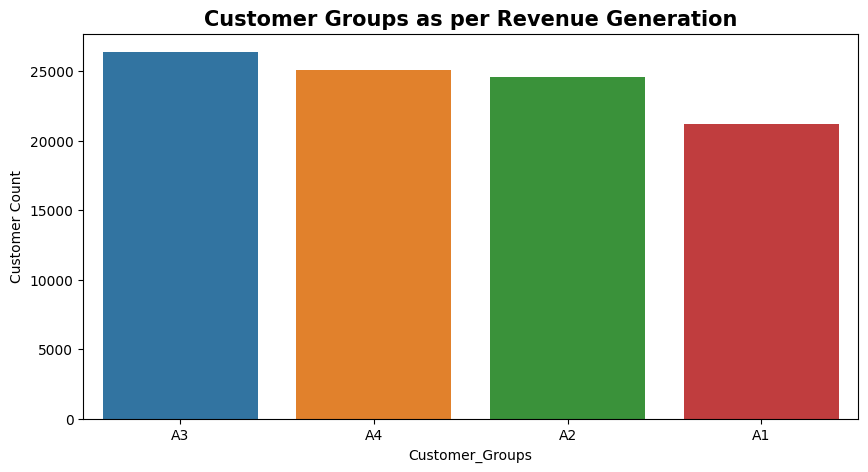

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(Customer_Rev_group, x ='groups', y = 'customer_id',ax = ax)
plt.xlabel('Customer_Groups')
plt.ylabel('Customer Count')
plt.title('Customer Groups as per Revenue Generation',size=15, weight='bold')
plt.show()

#####  As we can see the above chart that there is a very little difference between all the groups, but it shows that the majority of customers like to purchase products between average and below average prices. 

#### b. Divide the sellers into groups based on the revenue generated

In [97]:
Seller_Rev_group = data.groupby('groups')['seller_id'].nunique().sort_values(ascending = False).reset_index()
Seller_Rev_group

,groups,seller_id
0,A1,1872
1,A2,1812
2,A3,1769
3,A4,1673


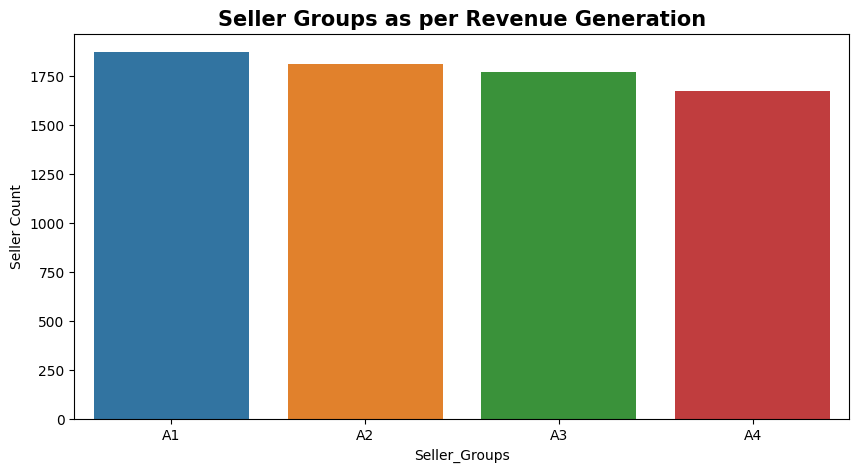

In [98]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(Seller_Rev_group, x ='groups', y = 'seller_id',ax = ax)
plt.xlabel('Seller_Groups')
plt.ylabel('Seller Count')
plt.title('Seller Groups as per Revenue Generation',size=15, weight='bold')
plt.show()

##### In the above chart it shows that group A3, A4 majority is less as compair to group A1, A2 but it is possible the a seller can sells different varities of product at different-different prices. 

#### 3. Cross-Selling (Which products are selling together) Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [99]:
data['purchase_date']= pd.to_datetime(data['order_purchase_timestamp']).dt.date

In [100]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,CohortIndex,tot_price,Customer_rev,year,days,time,product_id_short,product_category,groups,purchase_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,...,1,146.87,0.0,2017,25,10:35:00,b10169e8,Office_Furniture,A2,2017-05-16
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,1,137.89,137.9,2017,28,00:09:00,b10169e8,Office_Furniture,A1,2017-11-09
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,11/9/2017 0:50,11/10/2017 0:47,11/22/2017 1:43,...,1,137.89,137.9,2017,28,00:09:00,b10169e8,Office_Furniture,A1,2017-11-09
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,5/7/2017 20:11,5/8/2017 22:22,5/19/2017 20:16,...,1,140.61,0.0,2017,26,09:54:00,b10169e8,Office_Furniture,A2,2017-05-07
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2/3/2018 19:45,2/4/2018 22:29,2/19/2018 18:21,...,1,137.58,0.0,2018,28,21:09:00,b10169e8,Office_Furniture,A2,2018-02-03


In [101]:
data['seller_id_sort'] = data['seller_id'].str[-6:]
data['product_id_short'] = data['product_id'].str[-6:]
data['purchase_date'] = pd.to_datetime(data['purchase_date'])
data['order_id_short'] = data['order_id'].str[-6:]


In [108]:
Cross_sell_products = data.groupby(['purchase_date','order_id_short']).agg({ 'product_category_name':list,'product_id_short':list}).assign(count=lambda x: x['product_id_short'].str.len()).reset_index()

In [109]:
Cross_sell_products

,purchase_date,order_id_short,product_category_name,product_id_short,count
0,2016-09-04,bfc047,"[Furniture_Decor, Furniture_Decor]","[595400, c21fc2]",2
1,2016-09-05,071d35,[Telephony],[718962],1
2,2016-10-02,c0bcfa,[Baby],[6507b6],1
3,2016-10-03,2d4465,[Sports_Leisure],[3ea8c7],1
4,2016-10-03,522d14,[Sports_Leisure],[96c55d],1
...,...,...,...,...,...
95891,2018-08-29,aae1dc,[Health_Beauty],[58e92e],1
95892,2018-08-29,b6330a,"[Health_Beauty, Health_Beauty, Health_Beauty, ...","[6c0aff, 6c0aff, 6c0aff, 6c0aff, 6c0aff]",5
95893,2018-08-29,cd8fb6,[Food],[2ac626],1
95894,2018-08-29,ea3041,"[Kitchen_Dining_Laundry_Garden_Furniture, Kitc...","[e79335, e79335]",2


In [219]:
a = Cross_sell_products.groupby(Cross_sell_products['count'] == 2)
a.head()

,purchase_date,order_id_short,product_category_name,product_id_short,count
0,2016-09-04,bfc047,"[Furniture_Decor, Furniture_Decor]","[595400, c21fc2]",2
1,2016-09-05,071d35,[Telephony],[718962],1
2,2016-10-02,c0bcfa,[Baby],[6507b6],1
3,2016-10-03,2d4465,[Sports_Leisure],[3ea8c7],1
4,2016-10-03,522d14,[Sports_Leisure],[96c55d],1
5,2016-10-03,64b181,[Toys],[aec136],1
12,2016-10-04,0da8a3,"[Health_Beauty, Health_Beauty]","[3bc06b, 4d6179]",2
26,2016-10-04,37c6f9,"[Furniture_Decor, Furniture_Decor]","[b419a7, b419a7]",2
31,2016-10-04,553875,"[Furniture_Decor, Furniture_Decor]","[0cfff4, 0cfff4]",2
34,2016-10-04,58b0e0,"[Toys, Toys]","[c8a0a2, c8a0a2]",2


#### 4. Payment Behaviour a. How customers are paying?

##### here we take payment_installments for How customers are paying.

In [255]:
Cust_Pay = data.groupby(['payment_type','payment_installments'])['customer_id'].count()

In [259]:
Cust_Pay

payment_type  payment_installments
UPI           1                       22376
credit_card   0                           3
              1                       27168
              2                       13362
              3                       11505
              4                        7813
              5                        5894
              6                        4487
              7                        1767
              8                        4992
              9                         712
              10                       6704
              11                         25
              12                        163
              13                         19
              14                         15
              15                         91
              16                          7
              17                          7
              18                         34
              20                         21
              21                         

##### here we can see that majority of customers are prefer credit card  in various payment installments apart from that there are few customers who use other payment methods like UPI, debit Card, and Vouchers in a single installment. 

#### b. Which payment channels are used by most customers?

In [285]:
Pay_Channels = data.groupby('payment_type')['customer_id'].count().reset_index().sort_values(by = 'customer_id', ascending=False)
Pay_Channels.rename(columns= {'customer_id':'Count'}, inplace = True)
Pay_Channels

,payment_type,Count
1,credit_card,84831
0,UPI,22376
3,voucher,6114
2,debit_card,1639


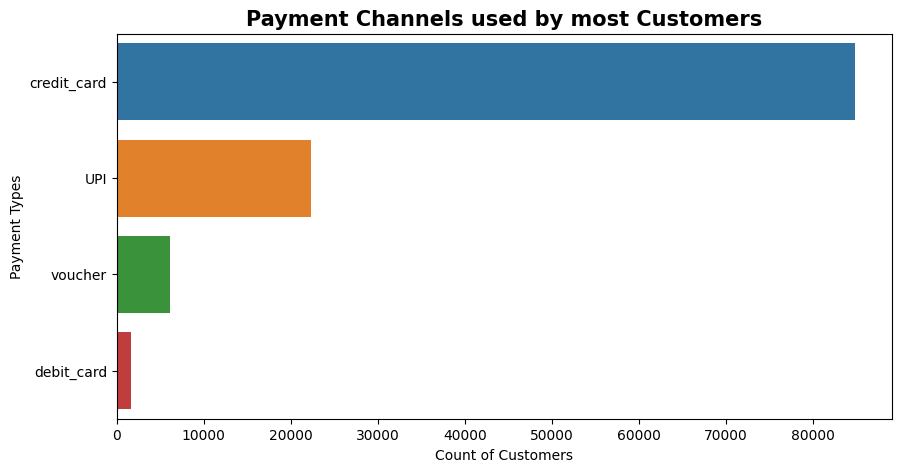

In [289]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(Pay_Channels, x ='Count', y = 'payment_type',ax = ax)
plt.xlabel('Count of Customers')
plt.ylabel('Payment Types')
plt.title('Payment Channels used by most Customers',size=15, weight='bold')
plt.show()

#### 5. Customer satisfaction towards category & product
#### a. Which categories (top 10) are maximum rated & minimum rated?

In [302]:
cat_rat = data.groupby('product_category_name')['review_score'].count().reset_index().sort_values(by = 'review_score', ascending=False).head(10)


In [303]:
cat_rat

,product_category_name,review_score
7,Bed_Bath_Table,11964
43,Health_Beauty,9947
65,Sports_Leisure,8802
39,Furniture_Decor,8754
15,Computers_Accessories,8024
49,Housewares,7260
70,Watches_Gifts,6209
68,Telephony,4706
42,Garden_Tools,4527
5,Auto,4363


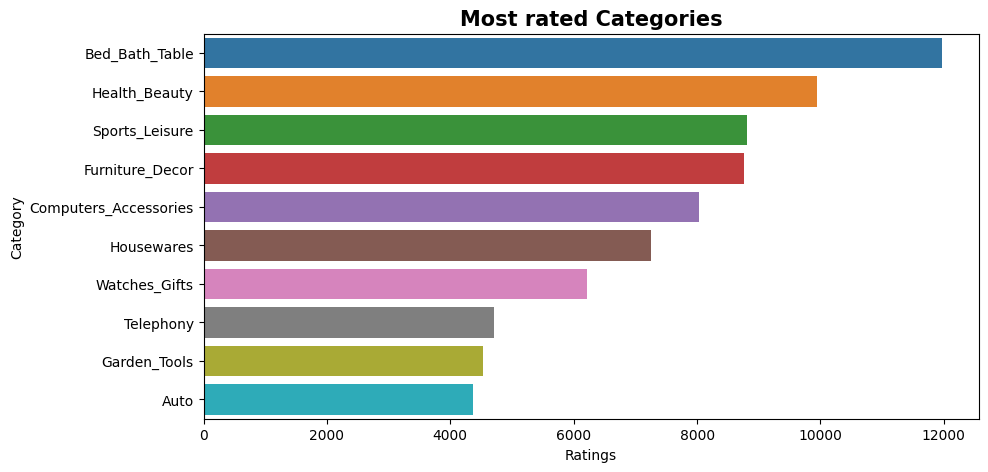

In [305]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(cat_rat, x ='review_score', y = 'product_category_name',ax = ax)
plt.xlabel('Ratings')
plt.ylabel('Category')
plt.title('Most rated Categories',size=15, weight='bold')
plt.show()

In [310]:
cat_rat1 = data.groupby('product_category_name')['review_score'].count().reset_index().sort_values(by = 'review_score', ascending=True).head(10)


In [311]:
cat_rat1

,product_category_name,review_score
61,Security_And_Services,2
29,Fashion_Childrens_Clothes,8
52,La_Cuisine,14
11,Cds_Dvds_Musicals,14
3,Arts_And_Craftmanship,24
32,Fashion_Sport,29
46,Home_Comfort_2,31
35,Flowers,33
23,Diapers_And_Hygiene,39
55,Music,39


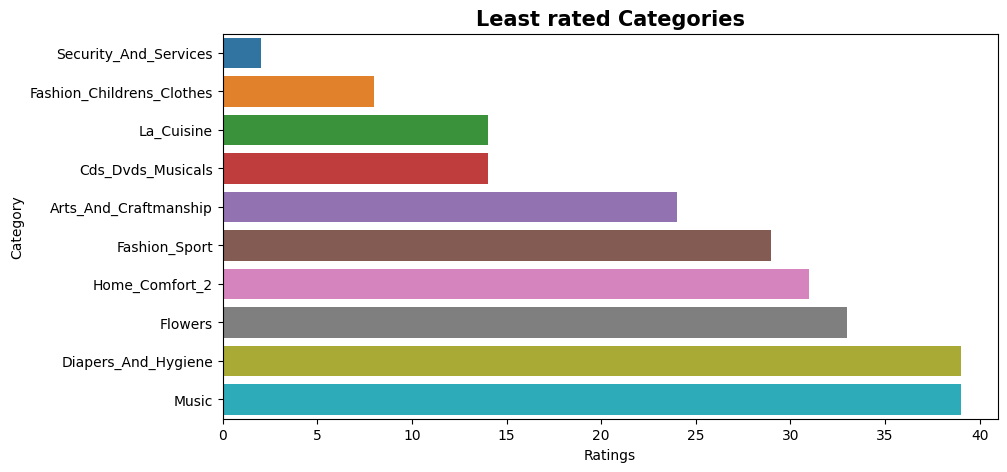

In [312]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(cat_rat1, x ='review_score', y = 'product_category_name',ax = ax)
plt.xlabel('Ratings')
plt.ylabel('Category')
plt.title('Least rated Categories',size=15, weight='bold')
plt.show()

#### b. Which products (top10) are maximum rated & minimum rated?

In [314]:
prod_rat = data.groupby('product_id_short')['review_score'].count().reset_index().sort_values(by = 'review_score', ascending=False).head(10)


In [315]:
prod_rat

,product_id_short,review_score
8739,4663af,536
19316,9b6058,528
28764,e7f83d,508
19573,9d9c6b,406
20335,a372db,398
10126,519f73,391
3904,1f2ac4,357
14784,772e08,327
10896,5804a6,295
28936,e95ad7,278


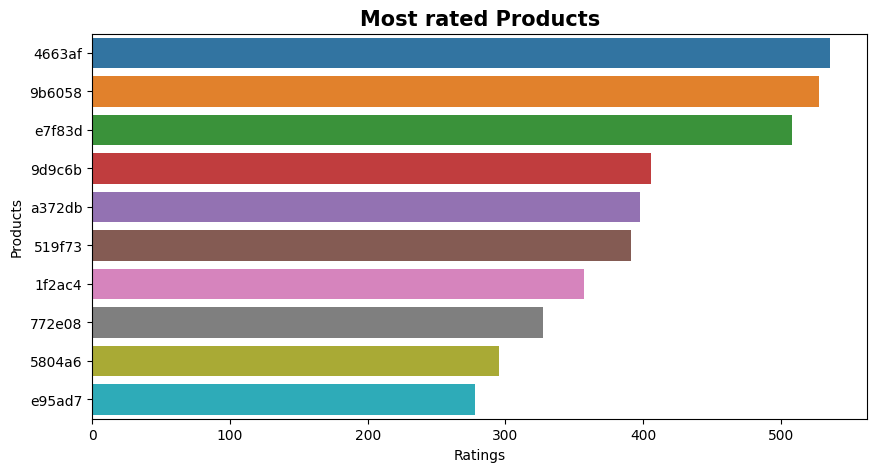

In [316]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(prod_rat, x ='review_score', y = 'product_id_short',ax = ax)
plt.xlabel('Ratings')
plt.ylabel('Products')
plt.title('Most rated Products',size=15, weight='bold')
plt.show()

In [318]:
prod_rat1 = data.groupby('product_id_short')['review_score'].count().reset_index().sort_values(by = 'review_score', ascending=True).head(10)


In [319]:
prod_rat1

,product_id_short,review_score
0,0001a6,1
17881,8f9538,1
17879,8f9099,1
17878,8f9090,1
17876,8f8bd0,1
17873,8f7f84,1
17872,8f7df8,1
17871,8f7086,1
17869,8f6aaa,1
17866,8f657f,1


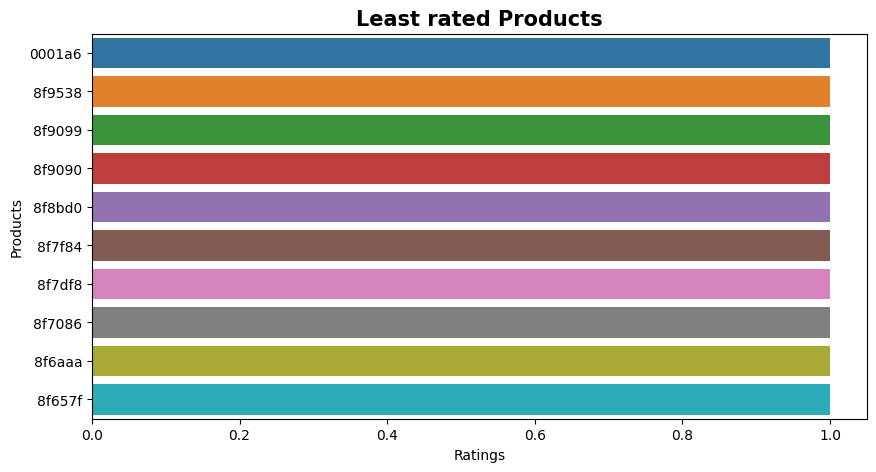

In [320]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(prod_rat1, x ='review_score', y = 'product_id_short',ax = ax)
plt.xlabel('Ratings')
plt.ylabel('Products')
plt.title('Least rated Products',size=15, weight='bold')
plt.show()

##### Above chart shows that top 10 least products rating are same. All have 1 rating score.

#### c. Average rating by location, seller, product, category, month etc.

In [359]:
Avg_rat_by_location = data.groupby(Geo_Location['geolocation_state'])['review_score'].mean().reset_index()


In [360]:
Avg_rat_by_location

,geolocation_state,review_score
0,Andhra Pradesh,3.871635
1,Arunachal Pradesh,3.985075
2,Chhattisgarh,4.077630
3,Delhi,4.077834
4,Goa,3.888889
5,Gujarat,3.902494
6,Haryana,4.003534
7,Himachal Pradesh,4.078947
8,Jammu & Kashmir,3.955285
9,Karnataka,3.939349


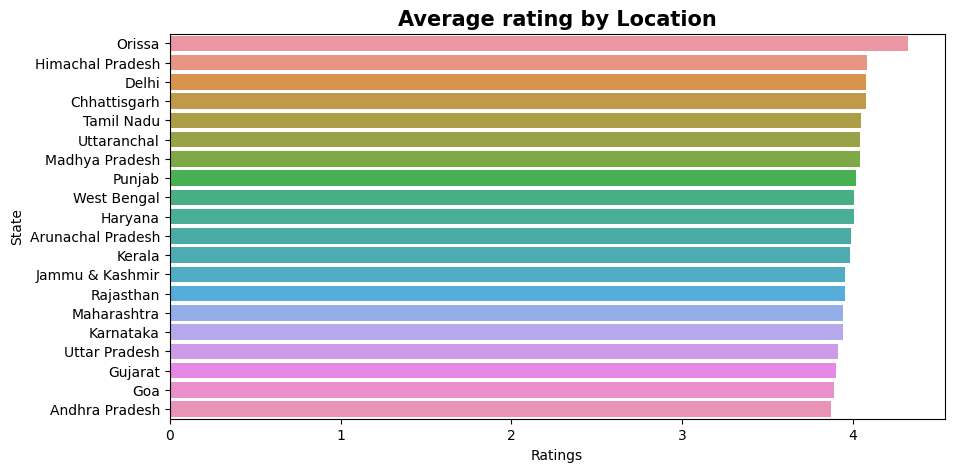

In [333]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(Avg_rat_by_location, y ='geolocation_state', x = 'review_score',ax = ax)
plt.xlabel('Ratings')
plt.ylabel('State')
plt.title('Average rating by Location',size=15, weight='bold')
plt.show()

##### Above chart shows that Orissa has the higest average rating and Andhra Pradesh has least Average rating.

In [355]:
Avg_rat_by_seller = data.groupby(data['seller_id'])['review_score'].mean().sort_values(ascending=False).reset_index()


In [356]:
Avg_rat_by_seller

,seller_id,review_score
0,cac4e0bc1a3269fa2b6ea5e763f6115b,5.0
1,71dc18fd8cbf5fd77f45dd8b427abb34,5.0
2,2063dd1b9f568df1c16741ea7d3e6adb,5.0
3,76833248bbc0e65a0293ec62023e4396,5.0
4,204b4e07bddef3c9b317f70189135b22,5.0
...,...,...
2971,5aaa890629f83706d8d9bfecd8377c1c,1.0
2972,e46bc031f2c5bae4ccb40bb90712e9b4,1.0
2973,58b98ccb79873e04eac4357cacc590d9,1.0
2974,586a871d4f1221763fddb6ceefdeb95e,1.0


In [376]:
Avg_seller = Avg_rat_by_seller.head(10)

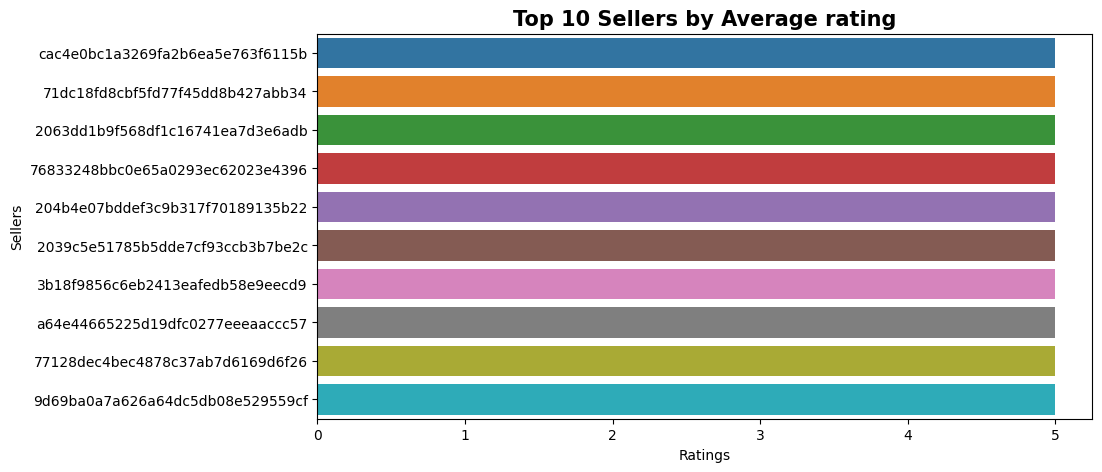

In [378]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(Avg_seller, y ='seller_id', x = 'review_score',ax = ax)
plt.xlabel('Ratings')
plt.ylabel('Sellers')
plt.title('Top 10 Sellers by Average rating',size=15, weight='bold')
plt.show()

In [351]:
Avg_rat_by_Month = data.groupby(['yearly_M'])['review_score'].mean().reset_index()
Avg_rat_by_Month

,yearly_M,review_score
0,2016-10,3.873077
1,2016-11,3.466667
2,2016-12,3.000000
3,2017-01,4.158501
4,2017-02,4.246951
5,2017-03,4.142708
6,2017-04,4.046248
7,2017-05,4.063225
8,2017-06,4.107660
9,2017-07,4.106826


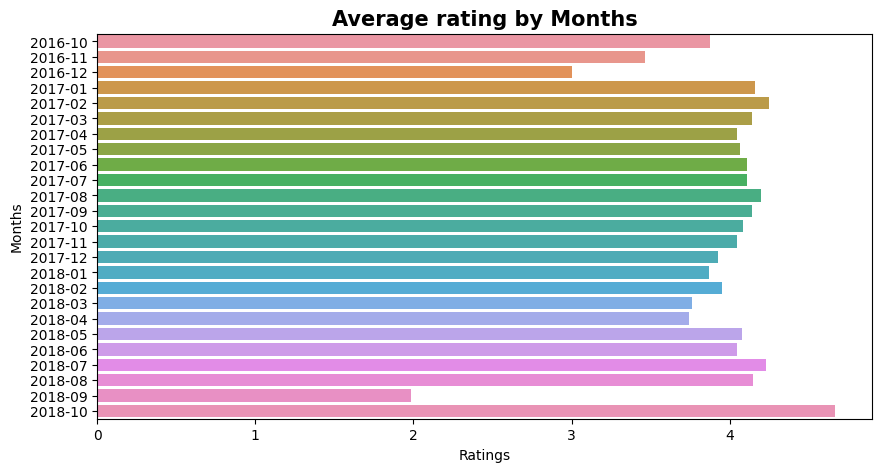

In [352]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(Avg_rat_by_Month, y ='yearly_M', x = 'review_score',ax = ax)
plt.xlabel('Ratings')
plt.ylabel('Months')
plt.title('Average rating by Months',size=15, weight='bold')
plt.show()

In [363]:
Avg_rat_by_Product = data.groupby(['product_id_short'])['review_score'].mean().sort_values(ascending= False).reset_index()
Avg_rat_by_Product

,product_id_short,review_score
0,0001a6,5.0
1,8855b2,5.0
2,884a71,5.0
3,884767,5.0
4,883dd0,5.0
...,...,...
31761,5fe2de,1.0
31762,908de2,1.0
31763,5fe180,1.0
31764,d9a21a,1.0


In [374]:
Avg_prod1 = Avg_rat_by_Product.head(10)

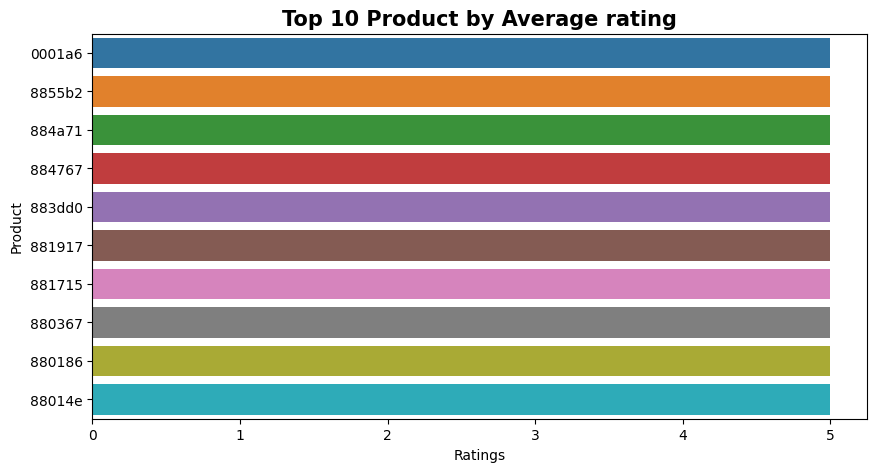

In [375]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(Avg_prod1, y ='product_id_short', x = 'review_score',ax = ax)
plt.xlabel('Ratings')
plt.ylabel('Product')
plt.title('Top 10 Product by Average rating',size=15, weight='bold')
plt.show()

In [368]:
Avg_rat_by_Category = data.groupby(['product_category_name'])['review_score'].mean().sort_values(ascending= False).reset_index()
Avg_rat_by_Category

,product_category_name,review_score
0,Cds_Dvds_Musicals,4.642857
1,Fashion_Childrens_Clothes,4.500000
2,Books_General_Interest,4.431616
3,Books_Imported,4.419355
4,Books_Technical,4.345588
...,...,...
66,Fashion_Male_Clothing,3.531034
67,Office_Furniture,3.461257
68,Home_Comfort_2,3.387097
69,Diapers_And_Hygiene,3.256410


In [369]:
Avg_cat1 = Avg_rat_by_Category.head(10)

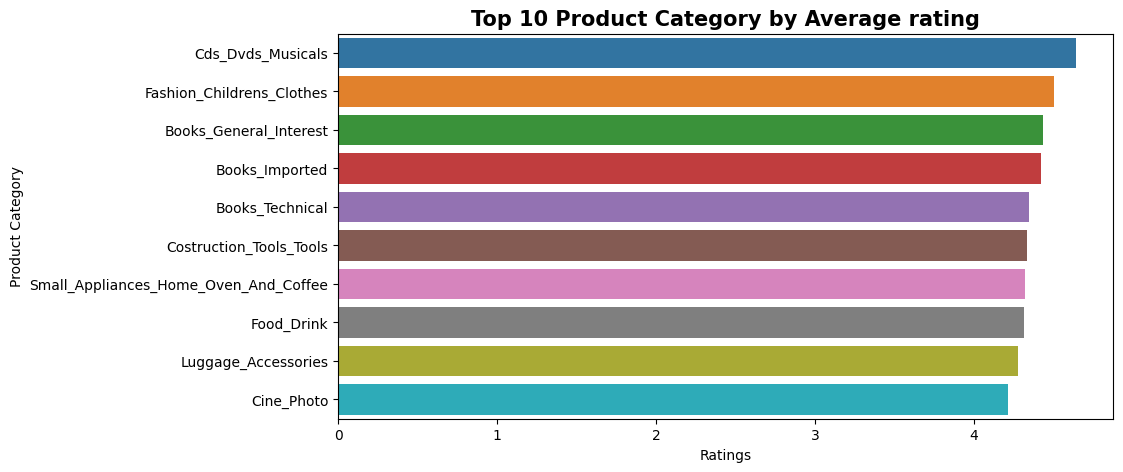

In [371]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(Avg_cat1, y ='product_category_name', x = 'review_score',ax = ax)
plt.xlabel('Ratings')
plt.ylabel('Product Category')
plt.title('Top 10 Product Category by Average rating',size=15, weight='bold')
plt.show()